In [1]:
import pandas as pd

In [2]:
# csv created from MIMIC-III using PostgreSQL
resultsetv2 = pd.read_csv('resultsetv2.csv', sep='#')

In [3]:
# Total de pacientes (por id único)
resultsetv2['subject_id'].nunique()

5542

In [4]:
# Gender of 5542 patients 
totalizador_gender = resultsetv2.groupby(['subject_id', 'gender']).agg(count_gender=('gender', 'count')).reset_index()

In [5]:
totalizador_gender.groupby(['gender']).agg(count_gender=('gender', 'count'))

,count_gender
gender,
F,2465
M,3077


# DataFrame Positive Cultures
Created from patients with sepsis who had positive cultures

In [7]:
positive_cultures = pd.read_csv('positive_cultures_ajustes.csv')

In [8]:
# Tabela de culturas positivas
positive_cultures

,org_name,spec_type,subject_id,hadm_id,ab_name,interpretation,age,gender,diagnoses,spec_itemid,isolate_num,org_itemid,ab_itemid
0,YEAST,SPUTUM,3,145834,NaN,NaN,76.52,M,Unspecified septicemia,70062.0,1.0,80075.0,NaN
1,YEAST,URINE,3,145834,NaN,NaN,76.52,M,Unspecified septicemia,70079.0,1.0,80075.0,NaN
2,YEAST,URINE,3,145834,NaN,NaN,76.52,M,Unspecified septicemia,70079.0,1.0,80075.0,NaN
3,GRAM NEGATIVE ROD(S),SWAB,3,145834,NaN,NaN,76.52,M,Unspecified septicemia,70070.0,1.0,80058.0,NaN
4,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",SWAB,3,145834,NaN,NaN,76.52,M,Unspecified septicemia,70070.0,1.0,80155.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262676,POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS,MRSA SCREEN,99991,151118,NaN,NaN,47.72,M,Severe sepsis,70091.0,1.0,80293.0,NaN
262677,POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS,MRSA SCREEN,99991,151118,NaN,NaN,47.72,M,Severe sepsis,70091.0,1.0,80293.0,NaN
262678,POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS,MRSA SCREEN,99991,151118,NaN,NaN,47.72,M,Unspecified septicemia,70091.0,1.0,80293.0,NaN
262679,POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS,MRSA SCREEN,99991,151118,NaN,NaN,47.72,M,Unspecified septicemia,70091.0,1.0,80293.0,NaN


In [9]:
# 4442 (80,1%) pacientes com exames culturais positivos
positive_cultures['subject_id'].nunique()

4442

In [10]:
# 50444 internações com exames culturais positivos
positive_cultures['hadm_id'].nunique()

5044

# DataFrame BLOOD CULTURES + 

In [11]:
# Created from positive cultures
blood_cultures = pd.read_csv('blood_cultures_positives.csv')

In [12]:
# 2477 (21,75%) pacientes com HEMOCULTURA positiva
blood_cultures['hadm_id'].nunique()

2477

## ANÁLISE 1
### Describe the prevalent microorganisms in positive blood cultures from patients with sepsis

In [13]:
# Quantidade de microorganismos diferentes presentes nos laudos de hemocultura positiva
blood_cultures['org_name'].nunique()

137

## Counting the microorganisms

In [14]:
# Grouping by microorganism and counting  
# This command counts the repetitions of microorganisms
analise_1 = blood_cultures.groupby(['hadm_id', 'subject_id', 'org_name']).agg(count_org_name=('org_name', 'count'))
analise_1 = analise_1.reset_index()
analise_1

,hadm_id,subject_id,org_name,count_org_name
0,100117,14297,STREPTOCOCCUS PNEUMONIAE,12
1,100124,19644,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1
2,100191,6741,KLEBSIELLA PNEUMONIAE,24
3,100261,52875,ESCHERICHIA COLI,30
4,100262,652,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",18
...,...,...,...,...
3446,199816,26012,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1
3447,199834,22782,ENTEROCOCCUS SP.,12
3448,199834,22782,KLEBSIELLA PNEUMONIAE,24
3449,199883,7029,BETA STREPTOCOCCUS GROUP B,5


In [15]:
# Count by microorganism without repeating the lines (Validated)
analise_1_absoluto = analise_1.groupby('org_name').agg(count_org_name=('org_name', 'count')).sort_values('count_org_name', ascending=False)

In [16]:
# Absolute values
analise_1_absoluto

,count_org_name
org_name,
"STAPHYLOCOCCUS, COAGULASE NEGATIVE",801
STAPH AUREUS COAG +,531
ESCHERICHIA COLI,382
ENTEROCOCCUS FAECIUM,180
KLEBSIELLA PNEUMONIAE,172
...,...
ENTEROBACTER SAKAZAKII,1
ENTEROBACTER AGGLOMERANS,1
PROTEUS SPECIES,1


In [17]:
# Percentage
analise_1_percent = analise_1_absoluto.reset_index()
count_org_name_sum = sum(analise_1_percent.count_org_name)
analise_1_percent.count_org_name = analise_1_percent.count_org_name * 100 / count_org_name_sum

In [18]:
analise_1_percent

,org_name,count_org_name
0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",23.210664
1,STAPH AUREUS COAG +,15.386844
2,ESCHERICHIA COLI,11.069255
3,ENTEROCOCCUS FAECIUM,5.215879
4,KLEBSIELLA PNEUMONIAE,4.984063
...,...,...
132,ENTEROBACTER SAKAZAKII,0.028977
133,ENTEROBACTER AGGLOMERANS,0.028977
134,PROTEUS SPECIES,0.028977
135,CRYPTOCOCCUS NEOFORMANS,0.028977


In [19]:
# TABLE Microorganisms present in positive blood cultures%
analise_1_percent.to_excel('microorganismos_hemoculturas.xlsx')

### Creating a graphic

In [39]:
import matplotlib.pyplot as plt

In [61]:
df_microrganisms_bloodculture = pd.read_excel('microorganismos_hemoculturas.xlsx')

In [62]:
microorganisms_bloodcultures_graph = df_microrganisms_bloodculture.head(5)

In [63]:
microorganisms_bloodcultures_graph

,Unnamed: 0,org_name,count_org_name
0,0,Staphylococcus coagulase negativa,23.210664
1,1,Staphylococcus aureus,15.386844
2,2,Escherichia coli,11.069255
3,3,Enterococcus faecium,5.215879
4,4,Klebsiella pneumoniae,4.984063


In [64]:
microorganisms_bloodcultures_graph['count_org_name'].astype(float)

0    23.210664
1    15.386844
2    11.069255
3     5.215879
4     4.984063
Name: count_org_name, dtype: float64

In [65]:
microorganisms_bloodcultures_graph_2 = microorganisms_bloodcultures_graph.reset_index()


In [66]:
microorganisms_bloodcultures_graph_2

,index,Unnamed: 0,org_name,count_org_name
0,0,0,Staphylococcus coagulase negativa,23.210664
1,1,1,Staphylococcus aureus,15.386844
2,2,2,Escherichia coli,11.069255
3,3,3,Enterococcus faecium,5.215879
4,4,4,Klebsiella pneumoniae,4.984063


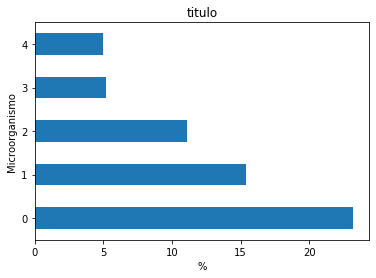

In [67]:
ax = microorganisms_bloodcultures_graph_2[['org_name','count_org_name']].plot(kind='barh', title ="titulo", legend=False)
ax.set_xlabel("%")
ax.set_ylabel("Microorganismo")
plt.show()

In [68]:
sorted_df = microorganisms_bloodcultures_graph_2.sort_values('count_org_name',ascending=False)
sorted_df

,index,Unnamed: 0,org_name,count_org_name
0,0,0,Staphylococcus coagulase negativa,23.210664
1,1,1,Staphylococcus aureus,15.386844
2,2,2,Escherichia coli,11.069255
3,3,3,Enterococcus faecium,5.215879
4,4,4,Klebsiella pneumoniae,4.984063


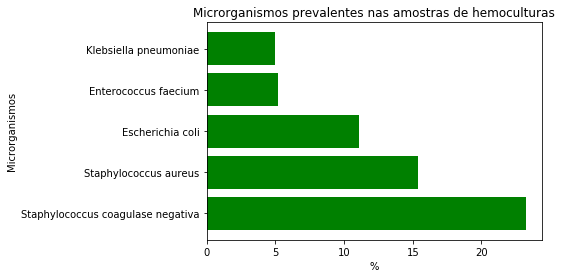

In [70]:
plt.barh('org_name','count_org_name', data=sorted_df, color = 'green')
plt.ylabel("Microrganismos")
plt.xlabel("%")
plt.title("Microrganismos prevalentes nas amostras de hemoculturas")
plt.show()

## ANALYSIS 2 
### Describe the antimicrobial susceptibility profile of microorganisms isolated in blood cultures

In [20]:
blood_cultures

,org_name,spec_type,subject_id,hadm_id,ab_name,interpretation,age,gender,diagnoses,spec_itemid,isolate_num,org_itemid,ab_itemid
0,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,21,111970,LINEZOLID,S,87.82,M,Other specified septicemias,70012.0,2.0,80168.0,90031.0
1,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,21,111970,AMPICILLIN,R,87.82,M,Other specified septicemias,70012.0,2.0,80168.0,90004.0
2,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,21,111970,NaN,NaN,87.82,M,Other specified septicemias,70012.0,1.0,80168.0,NaN
3,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,21,111970,LEVOFLOXACIN,R,87.82,M,Other specified septicemias,70012.0,2.0,80168.0,90025.0
4,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,21,111970,VANCOMYCIN,R,87.82,M,Other specified septicemias,70012.0,2.0,80168.0,90015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69790,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,99836,101018,PENICILLIN G,R,52.10,F,Streptococcal septicemia,70012.0,1.0,80168.0,90003.0
69791,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,99836,101018,VANCOMYCIN,R,52.10,F,Streptococcal septicemia,70012.0,1.0,80168.0,90015.0
69792,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,99836,101018,LINEZOLID,S,52.10,F,Streptococcal septicemia,70012.0,1.0,80168.0,90031.0
69793,ENTEROCOCCUS FAECIUM,BLOOD CULTURE,99836,101018,DAPTOMYCIN,S,52.10,F,Streptococcal septicemia,70012.0,1.0,80168.0,90030.0


In [21]:
# Counting the antimicrobials used
blood_cultures.groupby(['hadm_id', 'ab_name']).agg(count_ab_name=('ab_name', 'count'))
analise_2_ab = blood_cultures.groupby(['hadm_id', 'subject_id', 'ab_name']).agg(count_ab_name=('ab_name', 'count'))
analise_2_ab = analise_2_ab.reset_index()
analise_2_ab.groupby('ab_name').agg(count_ab_name=('ab_name', 'count')).sort_values('count_ab_name', ascending=False)

,count_ab_name
ab_name,
GENTAMICIN,1553
LEVOFLOXACIN,1202
VANCOMYCIN,973
TRIMETHOPRIM/SULFA,918
ERYTHROMYCIN,904
CEFTAZIDIME,831
TOBRAMYCIN,826
CEFTRIAXONE,792
MEROPENEM,792


In [22]:
# Grouping by resistance
analise_2_ab_resis = blood_cultures.groupby(['ab_name', 'interpretation']).agg(count_interpretation=('interpretation', 'count'))
analise_2_ab_resis

count_interpretation
ab_name            interpretation                      
AMIKACIN           I                                  4
                   R                                 11
                   S                                137
AMPICILLIN         I                                 16
                   R                               1246
...                                                 ...
TRIMETHOPRIM/SULFA R                                626
                   S                               2119
VANCOMYCIN         I                                 26
                   R                                548
                   S                               2951

[84 rows x 1 columns]

In [23]:
# Table of Antimicrobial sensitivity profile in positive blood cultures
analise_2_ab_resis.to_excel('perfil_sensibilidade_hemoculturas.xlsx')

## ANALYSIS 3 
### Describe infection sites related to sepsis (urinary tract, respiratory and others)

### * df positive_cultures

In [24]:
positive_cultures.groupby(['hadm_id', 'spec_type']).agg(count_spec_type=('spec_type', 'count'))

count_spec_type
hadm_id spec_type                        
100028  FLUID,OTHER                     4
100074  SWAB                           87
100117  BLOOD CULTURE                  12
100118  SPUTUM                          3
        URINE                          39
...                                   ...
199919  SPUTUM                          2
        URINE                           4
199929  BLOOD CULTURE                  22
        CSF;SPINAL FLUID                2
199988  PERITONEAL FLUID               21

[11391 rows x 1 columns]

In [25]:
spec_type_count = positive_cultures.groupby(['hadm_id', 'subject_id', 'spec_type']).agg(count_spec_type=('spec_type', 'count'))

In [26]:
spec_type_count = spec_type_count.reset_index()

In [27]:
spec_type_count

,hadm_id,subject_id,spec_type,count_spec_type
0,100028,53456,"FLUID,OTHER",4
1,100074,26885,SWAB,87
2,100117,14297,BLOOD CULTURE,12
3,100118,53749,SPUTUM,3
4,100118,53749,URINE,39
...,...,...,...,...
11386,199919,20790,SPUTUM,2
11387,199919,20790,URINE,4
11388,199929,67735,BLOOD CULTURE,22
11389,199929,67735,CSF;SPINAL FLUID,2


In [28]:
spec_type_count_abs = spec_type_count.groupby('spec_type').agg(count_spec_type=('spec_type', 'count')).sort_values('count_spec_type', ascending=False)

In [29]:
spec_type_count_abs

,count_spec_type
spec_type,
BLOOD CULTURE,2477
URINE,2382
SPUTUM,2113
SWAB,1051
BRONCHOALVEOLAR LAVAGE,532
CATHETER TIP-IV,503
MRSA SCREEN,424
STOOL,402
TISSUE,303


In [30]:
# Obter a porcentagem 
spec_type_count_percent = spec_type_count_abs.reset_index()
count_spec_type_sum = sum(spec_type_count_percent.count_spec_type)
spec_type_count_percent.count_spec_type = spec_type_count_percent.count_spec_type * 100 / count_spec_type_sum

In [31]:
spec_type_count_percent

,spec_type,count_spec_type
0,BLOOD CULTURE,21.745237
1,URINE,20.911246
2,SPUTUM,18.549732
3,SWAB,9.226582
4,BRONCHOALVEOLAR LAVAGE,4.670354
5,CATHETER TIP-IV,4.415767
6,MRSA SCREEN,3.722237
7,STOOL,3.529102
8,TISSUE,2.659995
9,"FLUID,OTHER",1.799666


In [32]:
spec_type_count_percent.to_excel('sitios de infeccao.xlsx')

In [33]:
analise_3_org_name = positive_cultures.groupby(['hadm_id', 'subject_id', 'org_name']).agg(count_org_name=('org_name', 'count'))

In [34]:
analise_3_org_name = analise_3_org_name.reset_index()

In [35]:
analise_3_absoluto = analise_3_org_name.groupby('org_name').agg(count_org_name=('org_name', 'count')).sort_values('count_org_name', ascending=False)

In [36]:
analise_3_absoluto

,count_org_name
org_name,
YEAST,2083
STAPH AUREUS COAG +,1481
"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1256
ESCHERICHIA COLI,903
ENTEROCOCCUS SP.,820
...,...
KLEBSIELLA OZAENAE,1
BORDETELLA BRONCHISEPTICA,1
LECLERCIA ADECARBOXYLATA,1


In [37]:
# Obter a porcentagem
analise_3_percent = analise_3_absoluto.reset_index()
count_org_name_sum = sum(analise_3_percent.count_org_name)
analise_3_percent.count_org_name = analise_3_percent.count_org_name * 100 / count_org_name_sum

In [38]:
analise_3_percent

,org_name,count_org_name
0,YEAST,14.711491
1,STAPH AUREUS COAG +,10.459778
2,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",8.870683
3,ESCHERICHIA COLI,6.377569
4,ENTEROCOCCUS SP.,5.791369
...,...,...
221,KLEBSIELLA OZAENAE,0.007063
222,BORDETELLA BRONCHISEPTICA,0.007063
223,LECLERCIA ADECARBOXYLATA,0.007063
224,LEGIONELLA SPECIES,0.007063


## ANÁLISE 4
### Descrever os sítios de infecção relacionados com o quadro de sepse (Trato urinários, respiratório entre outros) e os antimicrobianos utilizados

In [11]:
positive_cultures.groupby(['hadm_id', 'ab_name']).agg(count_ab_name=('ab_name', 'count'))

count_ab_name
hadm_id ab_name                            
100074  AMPICILLIN                        6
        AMPICILLIN/SULBACTAM              6
        CEFAZOLIN                         6
        CEFEPIME                          6
        CEFTAZIDIME                       6
...                                     ...
199988  MEROPENEM                         1
        PIPERACILLIN                      1
        PIPERACILLIN/TAZO                 2
        TOBRAMYCIN                        2
        TRIMETHOPRIM/SULFA                2

[45920 rows x 1 columns]

In [17]:
analise_4_atb = positive_cultures.groupby(['hadm_id', 'subject_id', 'ab_name']).agg(count_ab_name=('ab_name', 'count'))

In [18]:
analise_4_atb

count_ab_name
hadm_id subject_id ab_name                            
100074  26885      AMPICILLIN                        6
                   AMPICILLIN/SULBACTAM              6
                   CEFAZOLIN                         6
                   CEFEPIME                          6
                   CEFTAZIDIME                       6
...                                                ...
199988  25780      MEROPENEM                         1
                   PIPERACILLIN                      1
                   PIPERACILLIN/TAZO                 2
                   TOBRAMYCIN                        2
                   TRIMETHOPRIM/SULFA                2

[45920 rows x 1 columns]

In [19]:
analise_4_atb = analise_4_atb.reset_index()

In [20]:
analise_4_atb.groupby('ab_name').agg(count_ab_name=('ab_name', 'count')).sort_values('count_ab_name', ascending=False)

,count_ab_name
ab_name,
GENTAMICIN,3409
LEVOFLOXACIN,2529
TRIMETHOPRIM/SULFA,2383
CEFTAZIDIME,2328
TOBRAMYCIN,2312
CEFEPIME,2214
MEROPENEM,2198
VANCOMYCIN,2111
CIPROFLOXACIN,2053


In [66]:
positive_cultures.groupby(['ab_name', 'interpretation']).agg(count_interpretation=('interpretation', 'count'))

count_interpretation
ab_name              interpretation                      
AMIKACIN             I                                 57
                     R                                112
                     S                                972
AMPICILLIN           I                                 56
                     R                               4520
                     S                               3010
AMPICILLIN/SULBACTAM I                                947
                     R                               2423
                     S                               3423
CEFAZOLIN            I                                209
                     R                               2050
                     S                               4136
CEFEPIME             I                                825
                     P                                  1
                     R                               2102
                     S                               9107
CEFTAZIDIME          I                                744
                     P                                  1
                     R                               3187
                     S                               8547
CEFTRIAXONE          I                                283
                     R                               2056
                     S                               6277
CEFUROXIME           I                                509
                     R                               1195
                     S                               2438
CHLORAMPHENICOL      I                                  9
                     R                                 36
                     S                                672
CIPROFLOXACIN        I                                541
                     R                               5645
                     S                               5086
CLINDAMYCIN          I                                 16
                     R                               3517
                     S                               2597
DAPTOMYCIN           R                                  4
                     S                                625
ERYTHROMYCIN         I                                144
                     R                               5984
                     S                               2115
GENTAMICIN           I                               1073
                     R                               3005
                     S                              16365
IMIPENEM             I                                489
                     R                                709
                     S                               3814
LEVOFLOXACIN         I                                423
                     R                               8089
                     S                               4565
LINEZOLID            I                                 12
                     R                                 11
                     S                               1687
MEROPENEM            I                                471
                     P                                  2
                     R                               1038
                     S                              10233
NITROFURANTOIN       I                                479
                     R                                708
                     S                               2151
OXACILLIN            R                               6018
                     S                               2422
PENICILLIN           I                                 37
                     R                               5254
                     S                                906
PENICILLIN G         I                                 31
                     R                               1456
                     S                                667
PIPERACILLIN         I             